In [13]:
from trep import TREP


## Initialize TREP
- region: name or nuts3 code
- level (Municipality or nuts3)
- case: used for file storage
- db_path: can be specified to be on the caesar data drive ('CAESAR') or a manual directory

In [14]:
glr = TREP(region="Jülich", level="MUN", identifier="name", case="base", db_path=None)

## Estimate potential for Wind without existing and without slope

In [15]:
glr.Wind.estimate_potential(exclusion_dict={"existing": None, "slope": None})

Start exclusion!
Start Elevation
Done Elevation
[5, 3]
STAMP FLOOR: 858.49


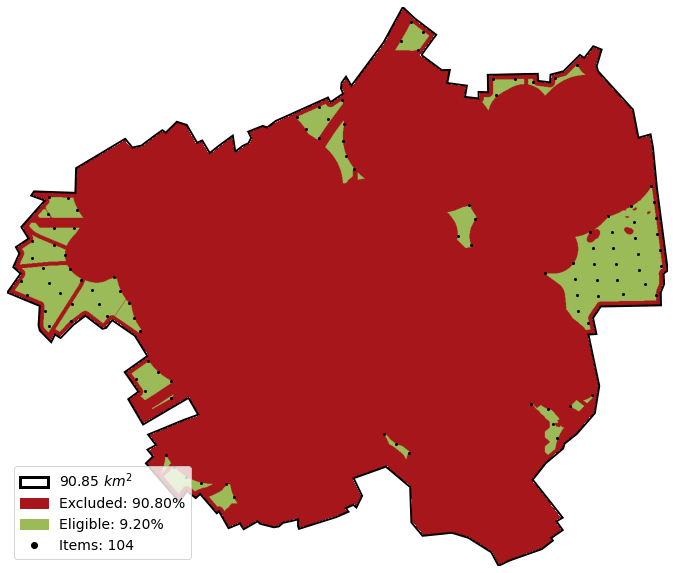

In [16]:
# Draw results
glr.Wind.ec.draw()

In [27]:
#Look at items
glr.Wind.predicted_items.capacity.head()

0    3000.0
1    3000.0
2    3000.0
3    3000.0
4    3000.0
Name: capacity, dtype: float64

## Estimate potential for OFPV at the side of roads
This time we load an exclusion dict first and have a look

In [18]:
exclusion_dict = glr.OpenfieldPVRoads.load_exclusionDict("openfield_roads_basis")
exclusion_dict

{'water_still': 0,
 'water_river': 0,
 'water_stream': 0,
 'motorway': 0,
 'trunk': 0,
 'primary': 0,
 'medium_roads': 0,
 'railways': 0,
 'power_lines': 100,
 'agriculture': None,
 'forests': 0,
 'urban': 0,
 'urban_osm': 0,
 'industrial': 0,
 'urban_industrial_osm': 0,
 'pofw_osm': 0,
 'pois_osm': 0,
 'traffic_osm': 0,
 'airports': 0,
 'mineral_extraction': 0,
 'dump_sites': 0,
 'construction': 0,
 'birds': 0,
 'protected': 0,
 'nature_protection': 0,
 'habitats': 0,
 'nationalpark': 0,
 'landscape': 0,
 'region_edge': 0,
 'existing': {'distance': [0.1, 0.1], 'wind_dir': 0, 'target_diameter': 0},
 'wind_100m': None,
 'wind_100m_power': None,
 'prior_wind_100m': None,
 'slope': None,
 'state': 'nrw',
 'soft_exclusion': None}

In [19]:
# Add slope
exclusion_dict["slope"] = 20

In [20]:
glr.OpenfieldPVRoads.estimate_potential(exclusion_dict=exclusion_dict)

Start exclusion!
Start Elevation
Done Elevation
A
STAMP FLOOR: 9801.0


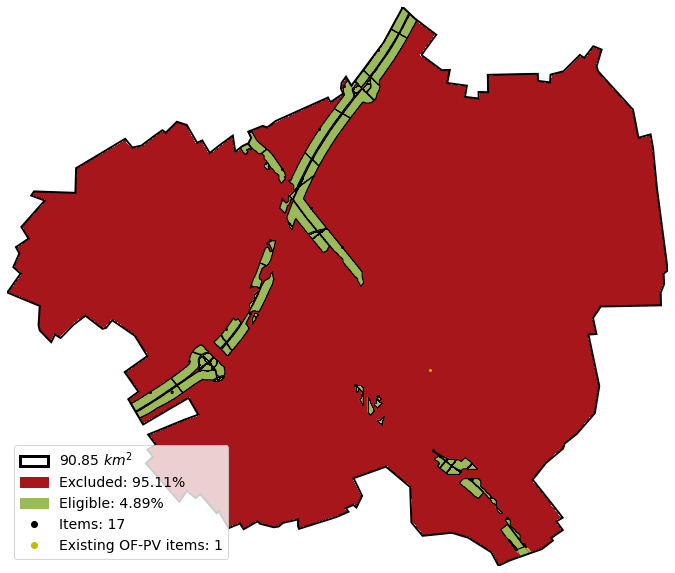

In [22]:
glr.OpenfieldPVRoads.ec.draw()

In [26]:
glr.OpenfieldPVRoads.predicted_items.head()

,capacity,geom,lon,lat,tilt,azimuth,elev,center,area
0,37826.116937,"MULTIPOLYGON (((4061800.0001 3095339.9999,4061...",6.309207,50.906891,39.241237,180,300,"[(4061517.22415636, 3094931.2306101816)]",341699.339992
1,42309.463616,"MULTIPOLYGON (((4066270.0001 3102429.9999,4066...",6.370259,50.971416,39.266972,180,300,"[(4066159.450555688, 3101887.2187461886)]",382199.309992
2,18331.881697,"MULTIPOLYGON (((4066510.0001 3102879.9999,4066...",6.375272,50.977495,39.269394,180,300,"[(4066544.426328037, 3102545.259652056)]",165599.653995
3,8236.031070,"MULTIPOLYGON (((4065580.0001 3095199.9999,4065...",6.370837,50.907971,39.241668,180,300,"[(4065851.9892529477, 3094834.502536002)]",74399.557998
4,29844.644282,"MULTIPOLYGON (((4063470.0001 3096609.9999,4063...",6.330400,50.919197,39.246148,180,300,"[(4063074.005907344, 3096223.8427041043)]",269599.316007
